### Import the data

In [1]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

df = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv')

df.isna().any()


FlowBytesSent                             False
FlowSentRate                              False
FlowBytesReceived                         False
FlowReceivedRate                          False
PacketLengthVariance                      False
PacketLengthStandardDeviation             False
PacketLengthMean                          False
PacketLengthMedian                        False
PacketLengthMode                          False
PacketLengthSkewFromMedian                False
PacketLengthSkewFromMode                  False
PacketLengthCoefficientofVariation        False
PacketTimeVariance                        False
PacketTimeStandardDeviation               False
PacketTimeMean                            False
PacketTimeMedian                          False
PacketTimeMode                            False
PacketTimeSkewFromMedian                  False
PacketTimeSkewFromMode                    False
PacketTimeCoefficientofVariation          False
ResponseTimeTimeVariance                

### Reduce the Dimensionality of the data

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Label', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(scaled_data)

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f"PC{i}" for i in range(1, pca_data.shape[1] + 1)])

data_pca = pd.concat([pca_df, df['Label']], axis=1)

data_pca.to_csv('data/data_pca.csv', index=False)

data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05
mean,3.658731e-17,-2.089890e-17,-9.111238e-18,-1.651412e-17,-4.783400e-18,-9.324783e-18,2.175308e-17,2.765403e-17,-6.503146e-17
std,2.542783e+00,1.970096e+00,1.811657e+00,1.587499e+00,1.443381e+00,1.329378e+00,1.250015e+00,1.155493e+00,9.856853e-01
min,-7.415404e+00,-1.600687e+01,-2.047457e+01,-1.159868e+01,-6.884867e+00,-2.311800e+01,-2.200835e+01,-4.627116e+00,-8.353476e+00
25%,-2.258650e+00,-8.195369e-01,-7.584232e-01,-1.008851e+00,-7.268759e-01,-3.842301e-01,-4.592442e-01,-6.140327e-01,-4.537443e-01
50%,-1.974742e-01,4.024743e-01,-1.125777e-01,3.884971e-02,-1.481825e-01,1.347707e-01,-1.549642e-02,-3.075062e-01,3.922855e-02
75%,1.743189e+00,9.474493e-01,5.728131e-01,9.849613e-01,5.218565e-01,3.845800e-01,6.479939e-01,3.678020e-01,3.813712e-01
max,1.138026e+01,2.504729e+01,2.425760e+01,2.071251e+01,3.148767e+01,3.124497e+01,2.472436e+01,2.478357e+01,1.495739e+01


### Visualize the data

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

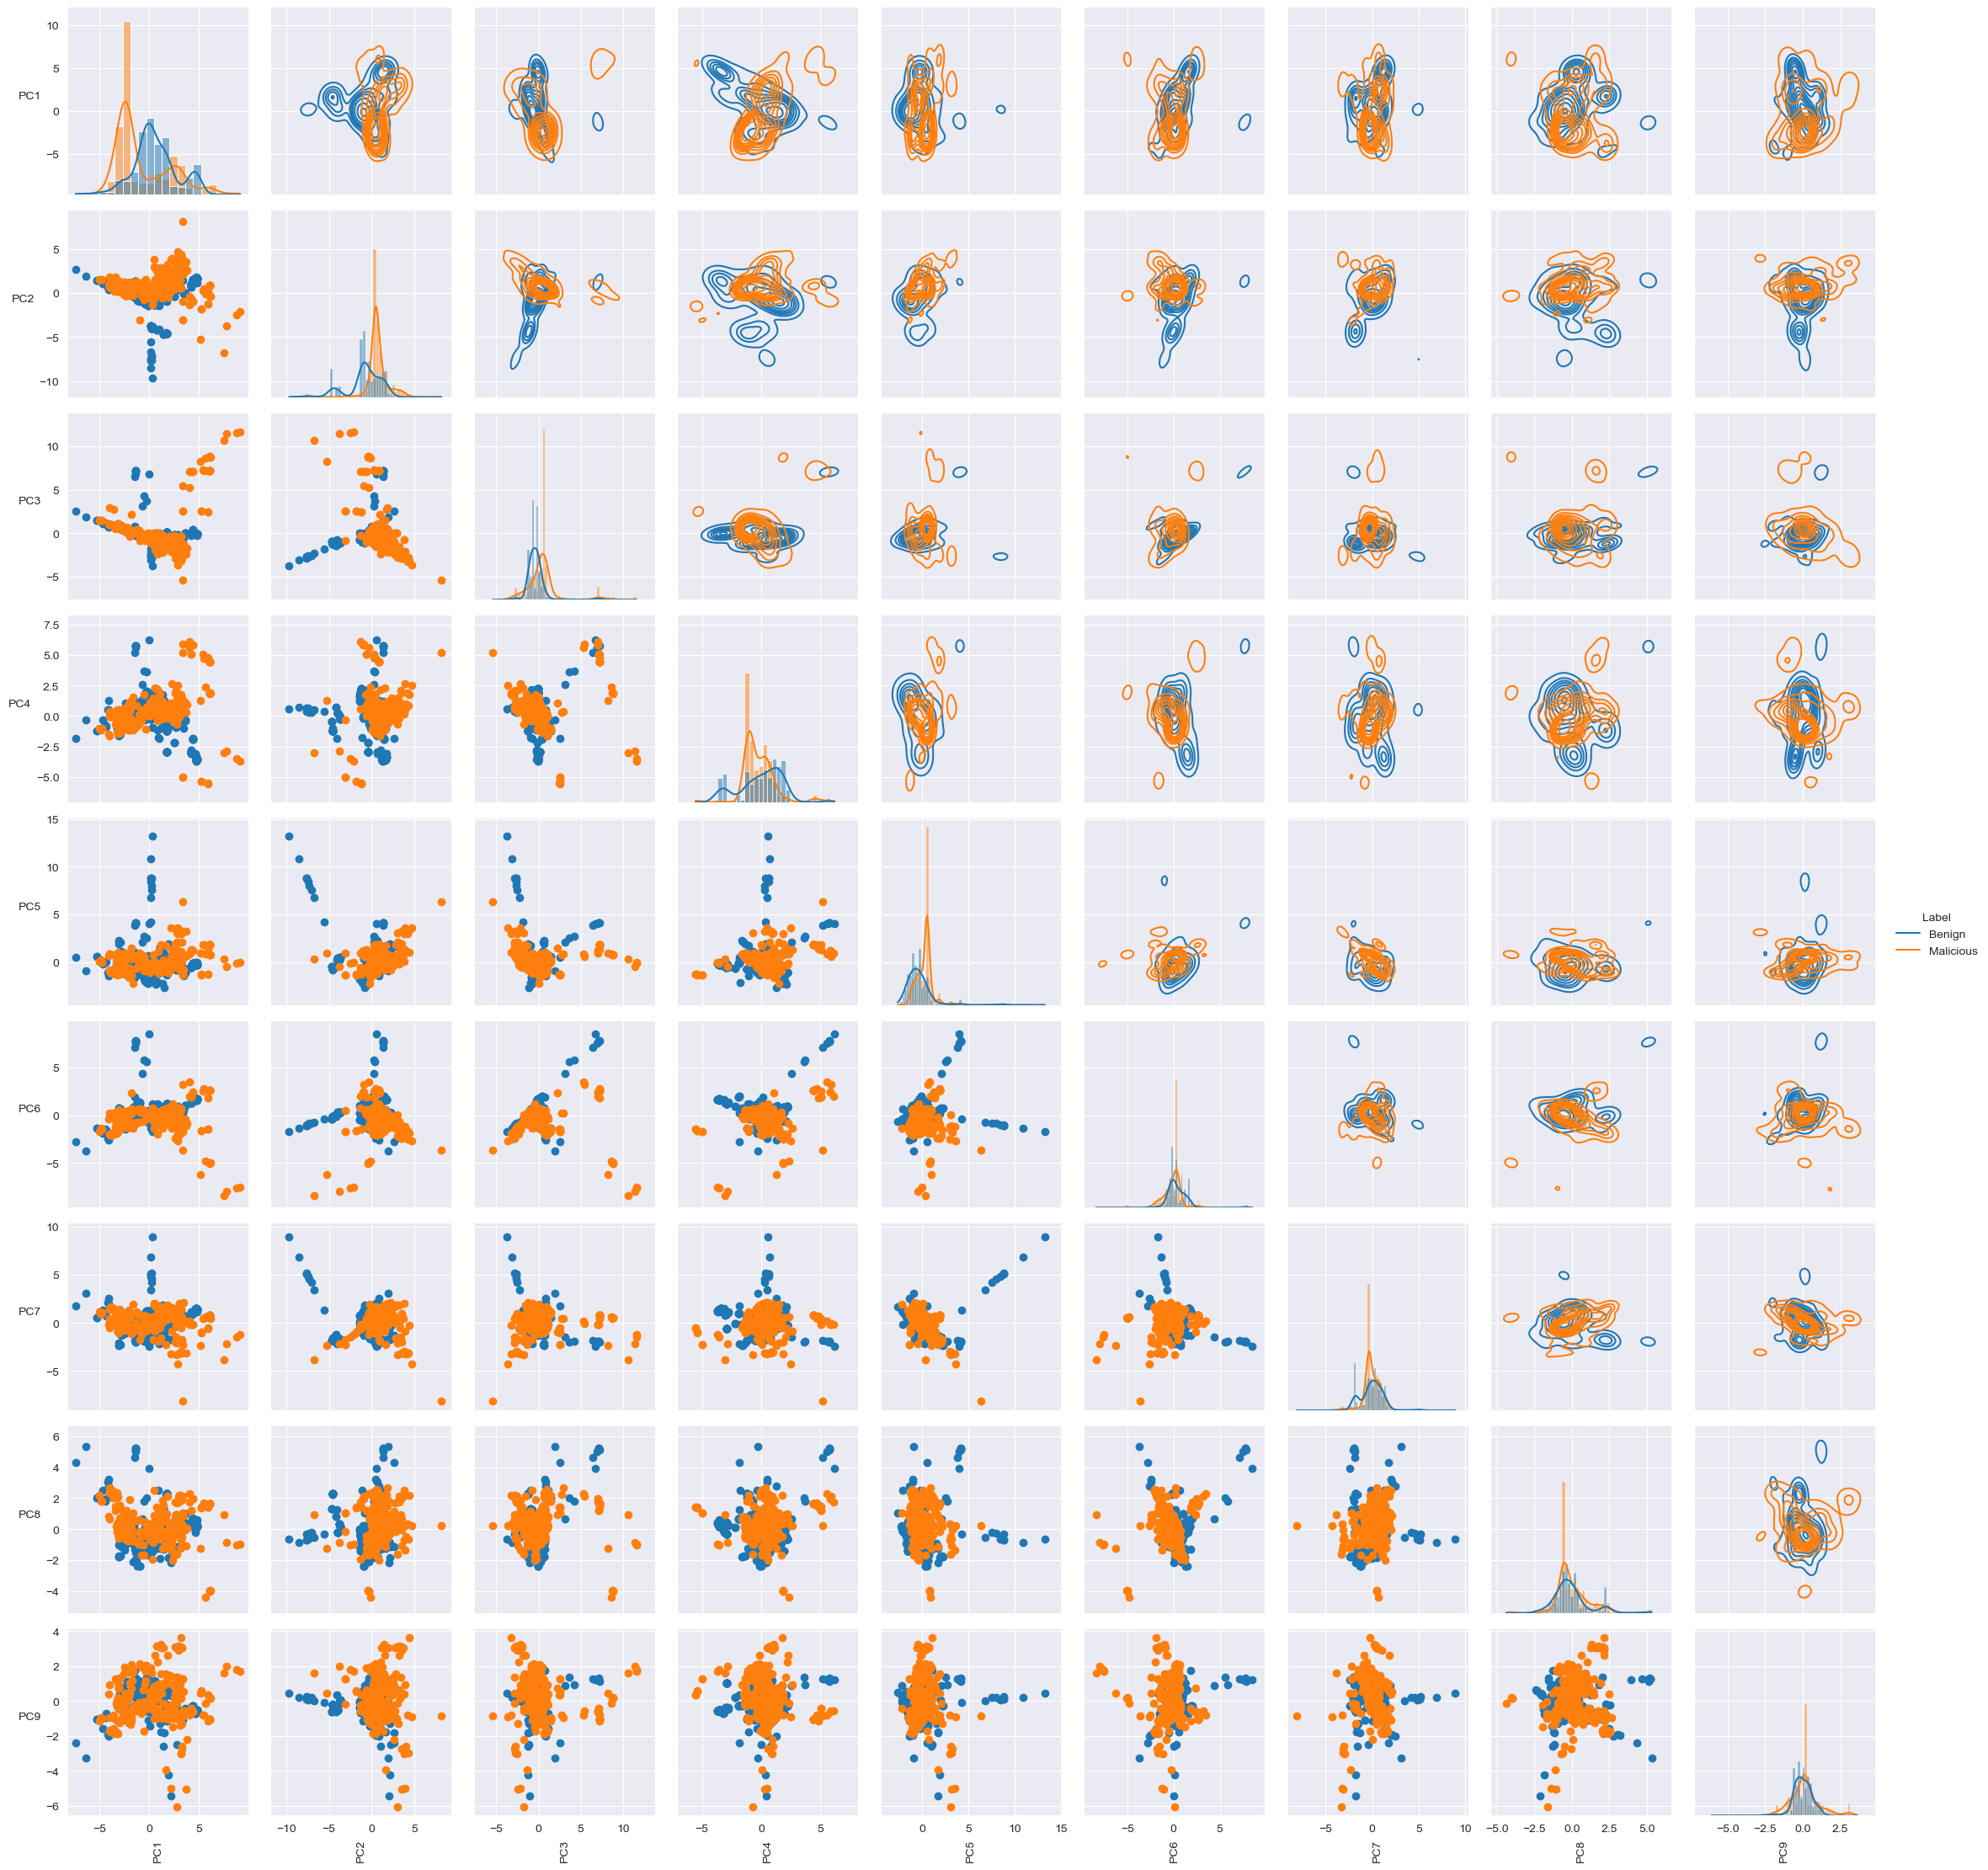

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

g = sb.PairGrid(data_pca.iloc[:1000][:], hue="Label")
g.map_diag(sb.histplot, kde=True)
g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot)

g.add_legend()

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.savefig('pca.png')
plt.show()